In [11]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")

home_dir = "../"
src_path = os.path.join(home_dir, "src")

# Add the `src` folder to the Python path
sys.path.append(src_path)

from functions import (compute_distance_correlation_matrix,
 compute_simplicial_complex_and_landscapes, compute_wto_matrix, compute_pearson_correlation_matrix,
  patient_correlation_measure)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# Load data
expression_matrix = pd.read_csv("../data/cancer_type/fpkm_matrix.csv", index_col=0)
significant_genes = pd.read_csv("../data/cancer_type/significant_genes.csv", index_col=0)

# Separate phenotype labels
phenotype = expression_matrix["phenotype"]
expression_matrix = expression_matrix.drop(columns=["phenotype"])

# Select significant genes
significant_gene_names = significant_genes.index
sig_exp_matrix = expression_matrix[significant_gene_names.intersection(expression_matrix.columns)]

top_var_genes_data = sig_exp_matrix
gene_dict = {i: col_name for i, col_name in enumerate(top_var_genes_data.columns)}
top_var_genes_data["phenotype"] = phenotype.values

sarc_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-SARC']
esca_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-ESCA']
pcpg_top_var_genes_data = top_var_genes_data[top_var_genes_data['phenotype'] == 'TCGA-PCPG']

sarc_top_var_genes_data = sarc_top_var_genes_data.drop(columns=["phenotype"])
esca_top_var_genes_data = esca_top_var_genes_data.drop(columns=["phenotype"])
pcpg_top_var_genes_data = pcpg_top_var_genes_data.drop(columns=["phenotype"])


SARC_wto_corr_matrix = compute_wto_matrix(sarc_top_var_genes_data.values)
ESCA_wto_corr_matrix = compute_wto_matrix(esca_top_var_genes_data.values)
PCPG_wto_corr_matrix = compute_wto_matrix(pcpg_top_var_genes_data.values)

# Define number of landscapes and resolution
num_landscape = 2
resolution = 100

# Split the data into training and testing sets for SARC
sarc_train, sarc_test = train_test_split(
    sarc_top_var_genes_data, test_size=0.2, random_state=42
)

# Split the data into training and testing sets for ESCA
esca_train, esca_test = train_test_split(
    esca_top_var_genes_data, test_size=0.2, random_state=42
)

# Split the data into training and testing sets for PCPG
pcpg_train, pcpg_test = train_test_split(
    pcpg_top_var_genes_data, test_size=0.2, random_state=42
)

In [8]:
# Compute landscapes for training and testing sets for SARC
sarc_train_landscapes = compute_simplicial_complex_and_landscapes(
    sarc_train.values, SARC_wto_corr_matrix, num_landscape, resolution
)
sarc_test_landscapes = compute_simplicial_complex_and_landscapes(
    sarc_test.values, SARC_wto_corr_matrix, num_landscape, resolution
)

# Compute landscapes for training and testing sets for ESCA
esca_train_landscapes = compute_simplicial_complex_and_landscapes(
    esca_train.values, ESCA_wto_corr_matrix, num_landscape, resolution
)
esca_test_landscapes = compute_simplicial_complex_and_landscapes(
    esca_test.values, ESCA_wto_corr_matrix, num_landscape, resolution
)

# Compute landscapes for training and testing sets for PCPG
pcpg_train_landscapes = compute_simplicial_complex_and_landscapes(
    pcpg_train.values, PCPG_wto_corr_matrix, num_landscape, resolution
)
pcpg_test_landscapes = compute_simplicial_complex_and_landscapes(
    pcpg_test.values, PCPG_wto_corr_matrix, num_landscape, resolution
)

# Combine training landscapes
train_landscapes = np.vstack([sarc_train_landscapes, esca_train_landscapes, pcpg_train_landscapes])
train_labels = np.concatenate([
    np.full(sarc_train_landscapes.shape[0], 0),  # Label 0 for SARC
    np.full(esca_train_landscapes.shape[0], 1),  # Label 1 for ESCA
    np.full(pcpg_train_landscapes.shape[0], 2)   # Label 2 for PCPG
])

# Combine testing landscapes
test_landscapes = np.vstack([sarc_test_landscapes, esca_test_landscapes, pcpg_test_landscapes])
test_labels = np.concatenate([
    np.full(sarc_test_landscapes.shape[0], 0),  # Label 0 for SARC
    np.full(esca_test_landscapes.shape[0], 1),  # Label 1 for ESCA
    np.full(pcpg_test_landscapes.shape[0], 2)   # Label 2 for PCPG
])

# Check shapes
print("Training Landscapes shape:", train_landscapes.shape)
print("Training Labels shape:", train_labels.shape)
print("Testing Landscapes shape:", test_landscapes.shape)
print("Testing Labels shape:", test_labels.shape)


Computing the Simplicial Complex and persistence for patients


100%|██████████| 207/207 [00:03<00:00, 63.51it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 52/52 [00:00<00:00, 56.96it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 147/147 [00:02<00:00, 61.25it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 37/37 [00:00<00:00, 65.32it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 143/143 [00:02<00:00, 65.26it/s]


Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Computing the Simplicial Complex and persistence for patients


100%|██████████| 36/36 [00:00<00:00, 65.90it/s]

Empty list or empty diagrams: sample range is [-inf, -inf]
First value and second value in range are the same: grid is made of resolution copies of this value
Training Landscapes shape: (497, 600)
Training Labels shape: (497,)
Testing Landscapes shape: (125, 600)
Testing Labels shape: (125,)


In [9]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, log_loss
from sklearn.model_selection import GridSearchCV


# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4], 
    'oob_score': [True]         # Minimum samples at a leaf node
}

# Perform Grid Search with Cross-Validation for Hyperparameter Tuning
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid_search.fit(train_landscapes, train_labels)

# Get the best model from Grid Search
best_rf_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Train the best model on training data
best_rf_model.fit(train_landscapes, train_labels)

# Evaluate the best model
train_predictions = best_rf_model.predict(train_landscapes)
test_predictions = best_rf_model.predict(test_landscapes)
test_probabilities = best_rf_model.predict_proba(test_landscapes)

train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)
classification_rep = classification_report(test_labels, test_predictions)
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Calculate metrics
mse = mean_squared_error(test_labels, np.argmax(test_probabilities, axis=1))
logloss = log_loss(test_labels, test_probabilities)

# Display results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Log Loss: {logloss:.4f}")
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

# Display OOB score
if hasattr(best_rf_model, 'oob_score_') and best_rf_model.oob_score_:
    print(f"OOB Score: {best_rf_model.oob_score_:.4f}")

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50, 'oob_score': True}
Training Accuracy: 0.9738
Test Accuracy: 0.8240
Mean Squared Error (MSE): 0.4160
Log Loss: 0.5152

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.88      0.78      0.83        37
           2       0.74      0.78      0.76        36

    accuracy                           0.82       125
   macro avg       0.82      0.82      0.82       125
weighted avg       0.83      0.82      0.82       125


Confusion Matrix:
 [[46  0  6]
 [ 4 29  4]
 [ 4  4 28]]
OOB Score: 0.8129


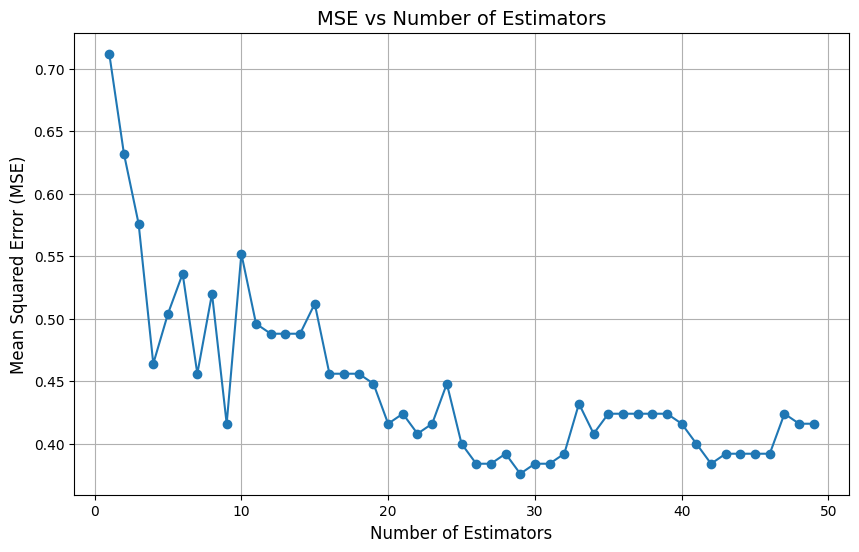

In [12]:
# Train the best model and evaluate
mse_values = []
n_estimators_range = list(range(1, best_rf_model.n_estimators))
for n in n_estimators_range:
    temp_model = RandomForestClassifier(
        n_estimators=n,
        max_depth=best_rf_model.max_depth,
        min_samples_split=best_rf_model.min_samples_split,
        min_samples_leaf=best_rf_model.min_samples_leaf,
        oob_score=True,
        random_state=42
    )
    temp_model.fit(train_landscapes, train_labels)
    predictions = temp_model.predict(test_landscapes)
    probabilities = temp_model.predict_proba(test_landscapes)
    mse = mean_squared_error(test_labels, np.argmax(probabilities, axis=1))
    mse_values.append(mse)

# Plotting MSE vs Number of Estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, mse_values, marker='o')
plt.title('MSE vs Number of Estimators', fontsize=14)
plt.xlabel('Number of Estimators', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.grid(True)
plt.show()